In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# import, view & statistically explore the data
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# ✅ **NOTE :**
The dataset contains 1338 entries and 7 columns, each representing different attributes:

1. **Age:** The age of the primary beneficiary (numerical)

2. **Sex:** The policyholder's gender (categorical: male, female)

3. **BMI:** Body mass index (numerical, float)

4. **Children:** Number of children or dependents covered by the health insurance (numerical)

4. **Smoker:**  Smoking status of the policyholder (categorical: yes, no)

5. **Region:** The beneficiary's residential area in the US (categorical: northeast, southeast, southwest, northwest)

6. **Charges:** Individual medical costs billed by health insurance (numerical, float)

All columns are fully populated with non-null data. The data types are appropriate for each column (numerical for "age", "bmi", "children", and "charges"; categorical for "sex", "smoker", and "region").

In [ ]:
# Numerical description
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# ✅ **NOTE :**
 The statistical summary of the numerical columns is as follows:

1. **Age:** The average age in the dataset is approximately 39 years, with a standard deviation of approximately 14 years. The minimum age is 18 years, and the maximum is 64 years. The 25th, 50th (median), and 75th percentiles are 27, 39, and 51 years, respectively, indicating a fairly even distribution across different age groups.

2. **BMI:** The average Body Mass Index (BMI) is approximately 30.66, with a standard deviation of around 6.10, suggesting variability in body sizes. The minimum BMI is around 15.96, and the maximum is 53.13. The interquartile range (25th to 75th percentile) spans from 26.30 to 34.69.

3. **Children:**  On average, individuals in the dataset have approximately 1.09 children (rounded to 1), with a standard deviation of approximately 1.21. The maximum number of children is 5, with at least 25% of individuals not having any children (based on the 25th percentile).

4. **Charges:** : The average charge is approximately $13,270  with a large standard deviation of approximately $12,110  indicating significant variability in the charges. The charges range from a minimum of approximately $1,122 to a maximum of around $63,770. The median charge is $9,382, which is lower than the average, suggesting a right-skewed distribution (presence of larger values pulling the mean upwards).

# 📈 Visualisation :

#Age


Text(0.5, 1.0, 'Age Distribution with Density')

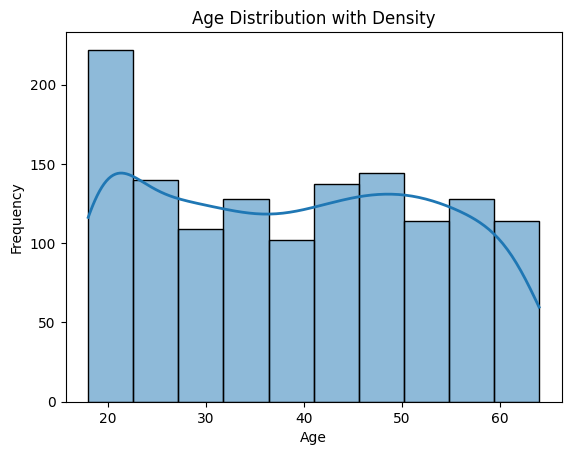

In [ ]:
import seaborn as sns

sns.histplot(data['age'], kde=True, bins=10, line_kws={'linewidth': 2})


plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution with Density')


# Sex

Text(0.5, 1.0, 'Sex Distribution')

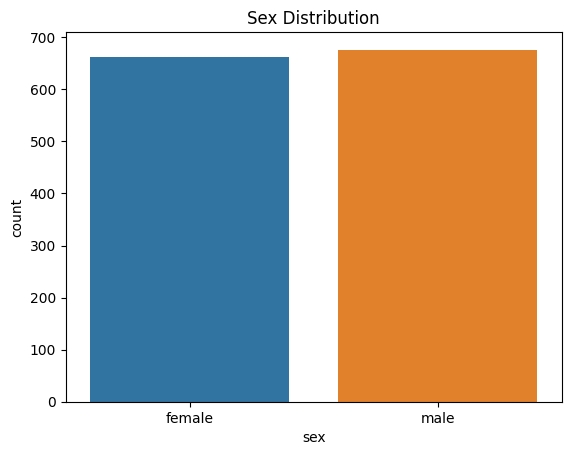

In [ ]:
sns.countplot(x='sex', data=data)

plt.title('Sex Distribution')


# BMI

Text(0.5, 1.0, 'BMI Distribution with Density')

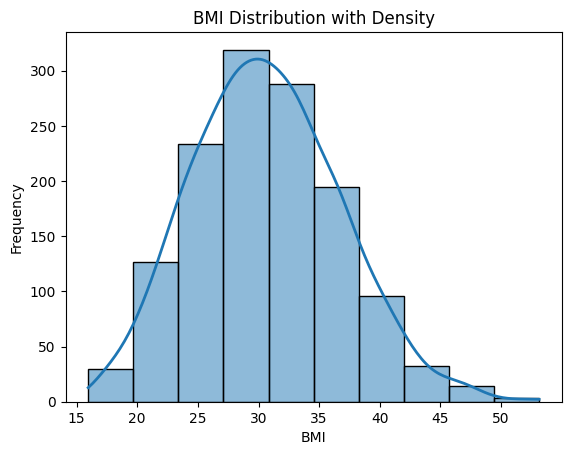

In [ ]:
sns.histplot(data['bmi'], kde=True, bins=10, line_kws={'linewidth': 2})


plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution with Density')


# Smoker


Text(0.5, 1.0, 'Smoker Distribution')

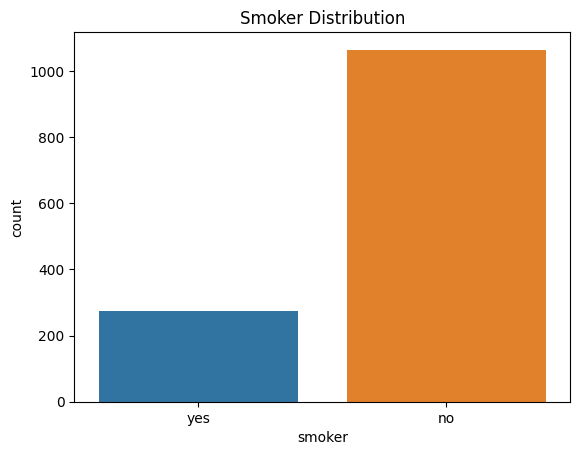

In [ ]:
sns.countplot(x='smoker', data=data)

plt.title('Smoker Distribution')


# Children

Text(0.5, 1.0, 'Children Distribution')

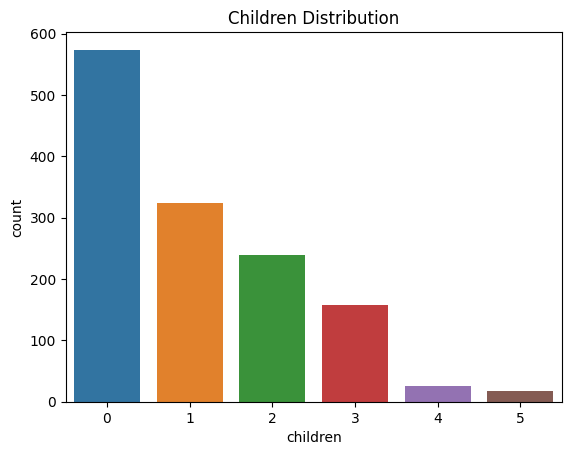

In [ ]:
sns.countplot(x='children', data=data)

plt.title('Children Distribution')


# Region


Text(0.5, 1.0, 'Region Distribution')

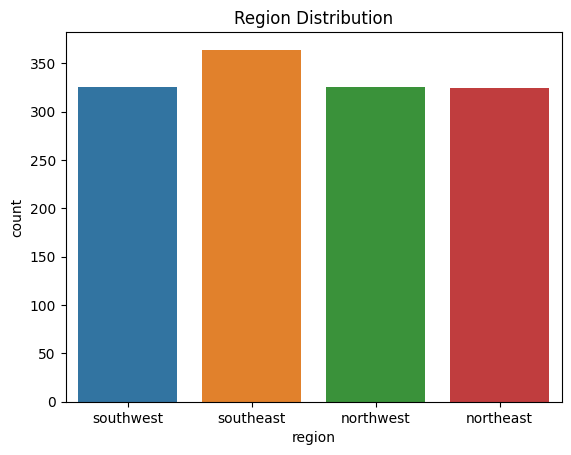

In [ ]:
sns.countplot(x='region', data=data)

plt.title('Region Distribution')


# Target Variable (Charges)

Text(0.5, 1.0, 'Charges Distribution with Density')

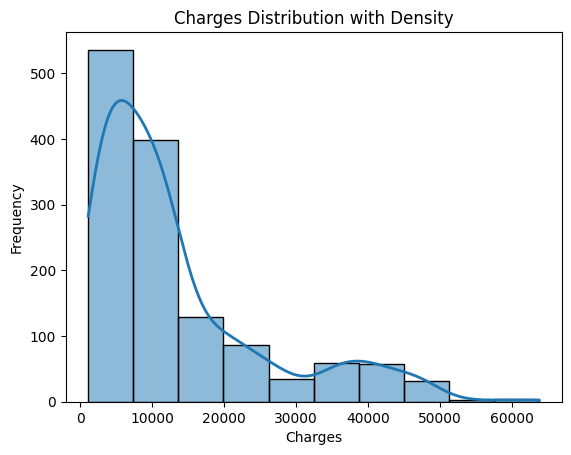

In [ ]:
sns.histplot(data['charges'], kde=True, bins=10, line_kws={'linewidth': 2})


plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution with Density')


# ✅ **Histograms :**
1. **Age:** The distribution seems relatively uniform, with slight increases in the frequency at around 20 (young adults) and between 30 to 40 years old. The distribution is slightly right-skewed.
2. **BMI:** The distribution of BMI resembles a normal distribution but with a right skew. Most individuals have a BMI ranging from approximately 25 to 35, aligning with the global average ranges of normal weight to overweight categories.
3. **Children:** A significant number of individuals do not have children (0), followed by those with one or two children. The number of individuals decreases with an increasing number of children. This variable is right-skewed.
4. **Charges:** Most individuals incur charges on the lower end of the spectrum, with a small number of individuals incurring very high medical costs. This distribution is highly right-skewed, indicating the presence of outliers with high medical expenses.

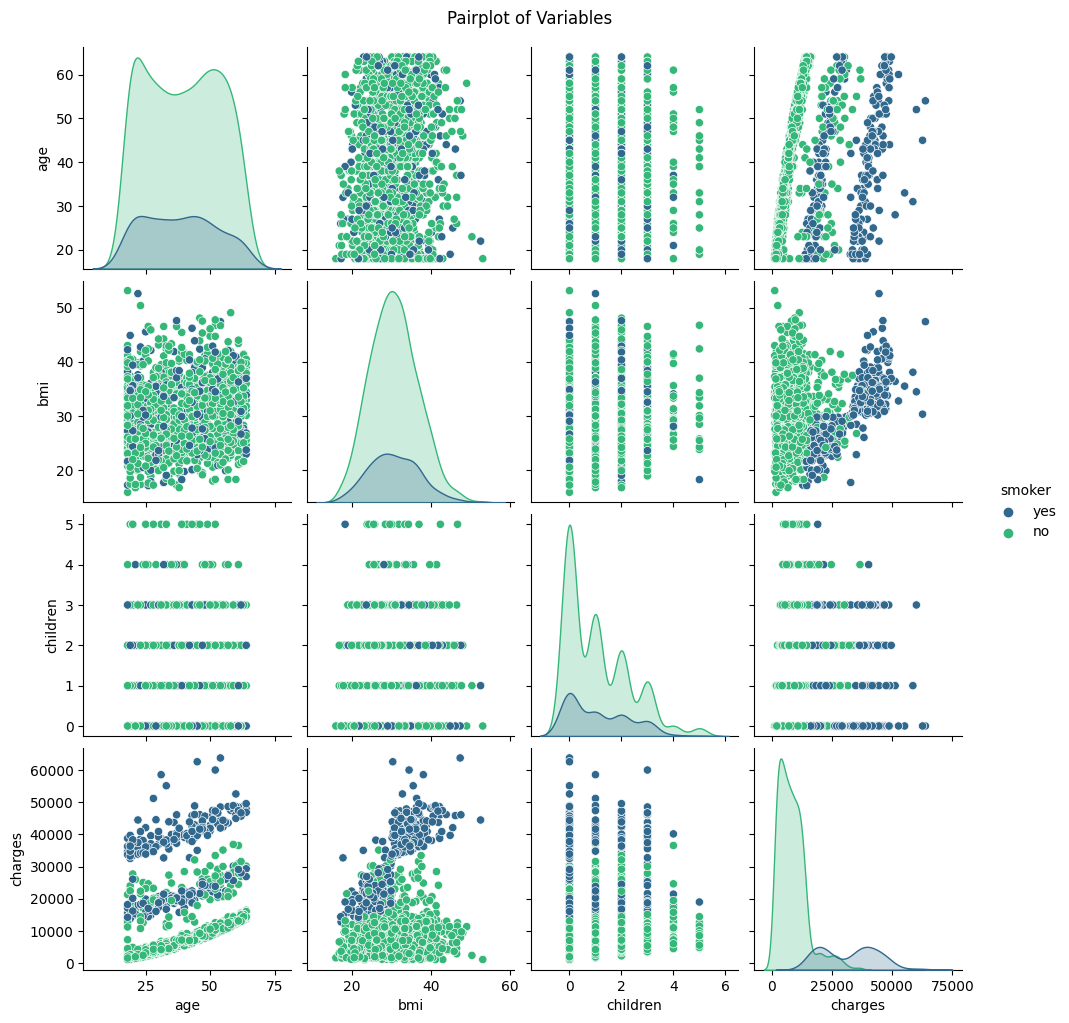

In [ ]:
# Relationship of Smoking with the other variables
sns.pairplot(data, kind='scatter', diag_kind='kde', hue='smoker', palette='viridis')
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()


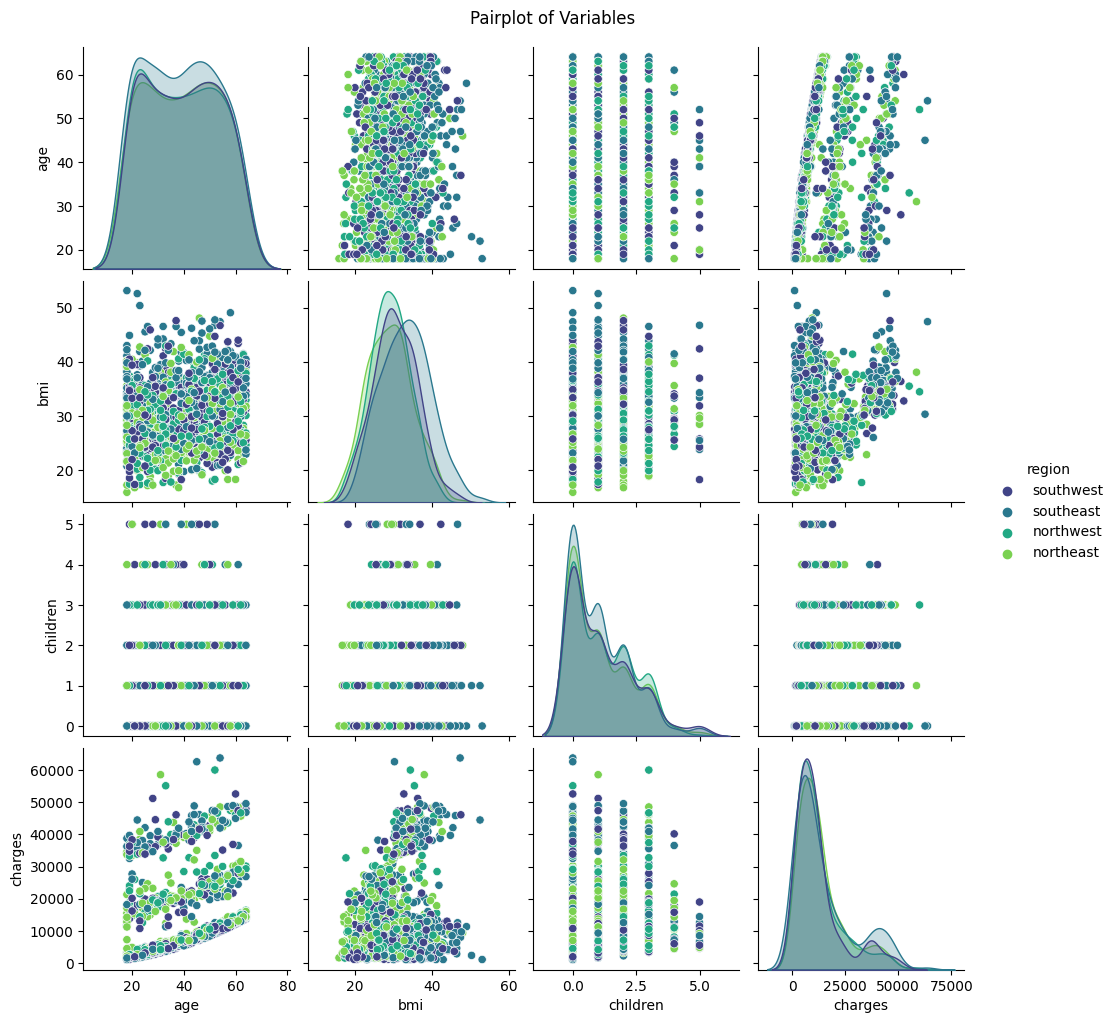

In [ ]:
# Relationship of Region with the other variables
sns.pairplot(data, kind='scatter', diag_kind='kde', hue='region', palette='viridis')
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()



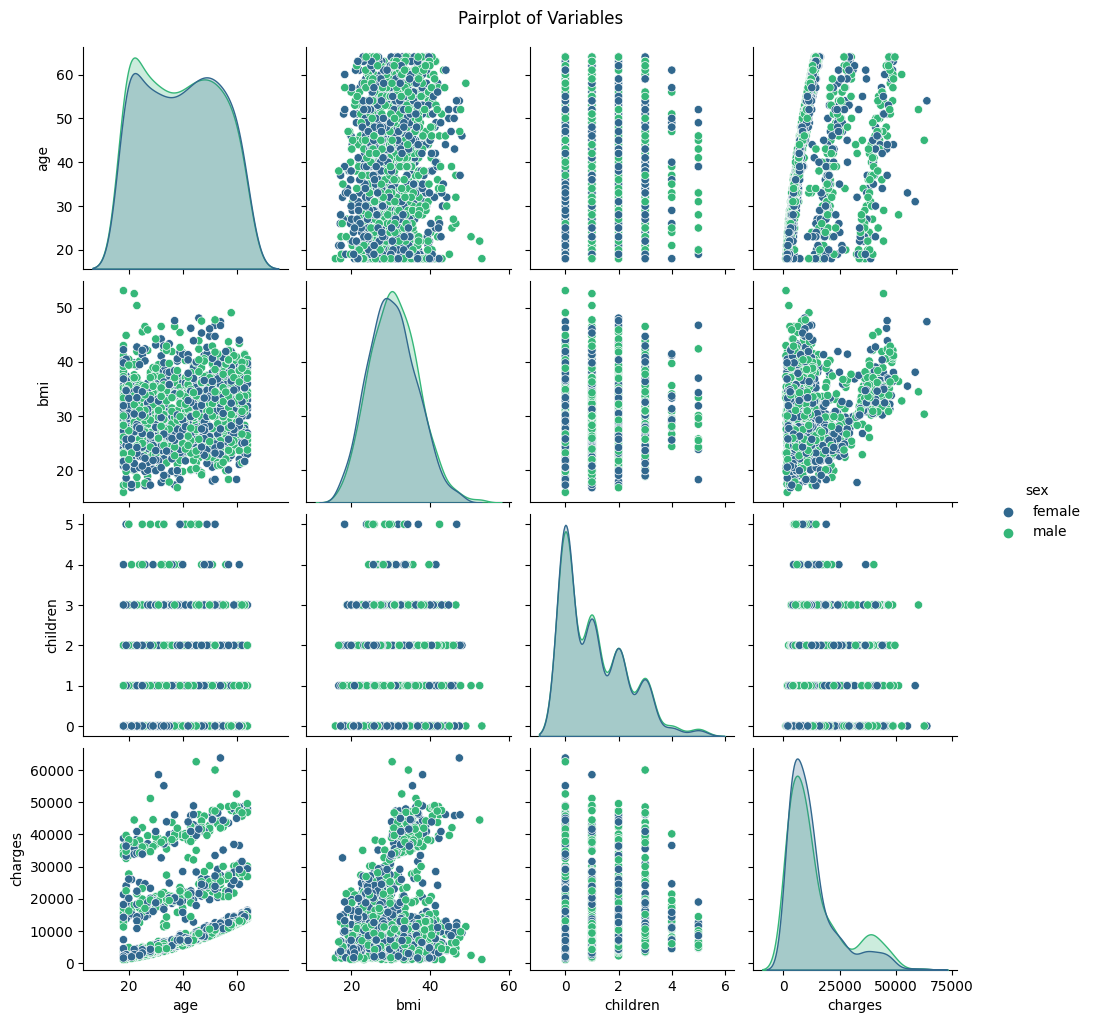

In [ ]:
# Relationship of Sex with the other variables
sns.pairplot(data, kind='scatter', diag_kind='kde', hue='sex', palette='viridis')
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()


## 🛑 : The pairplot, with 'smoker' as the hue, shows distinct clusters, especially in the 'charges' distribution, indicating that smokers tend to have higher medical costs.

# Coorelation


In [ ]:
 # OneHot encode the categorical variables
 data_oneHot = pd.get_dummies(data, drop_first=True)
 data_oneHot

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

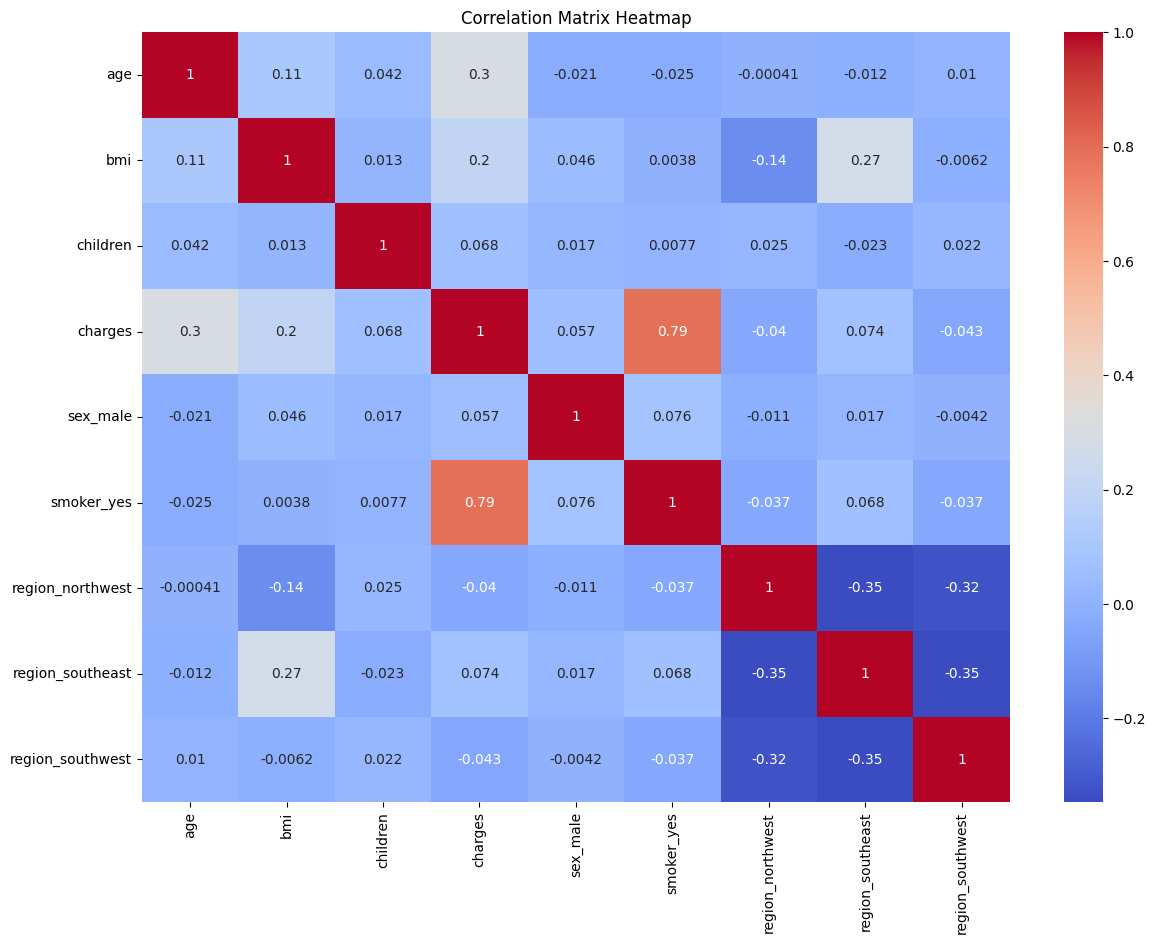

In [ ]:
corr_matrix = data_oneHot.corr()

plt.figure(figsize=(14, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix Heatmap')




# ✅  **Correlation Matrix:**

* There's a moderate positive correlation between 'age' and 'charges' (0.30),
suggesting that older individuals tend to have higher medical costs.
* 'bmi' also has a moderate positive correlation with 'charges' (0.20), indicating that individuals with higher BMI might incur higher medical costs.
* 'children' have a very low positive correlation with 'charges' (0.07), suggesting the number of dependents doesn't significantly affect medical costs.
* 'smoker' There's a high positive correlation between 'smoke_yes' and 'charges' (0.79), indecating the that being a smoker increase the medical insurance charges.  


# 🪙 :     
Given the understanding that the goal is to build a predictive model for healthcare charges, it would be crucial to include "smoker," "age," and "bmi" as they have more substantial correlations with the target variable. "Sex," "children," and "region" could be included for a more comprehensive model, but they might not contribute as significantly to the model's predictive power.  Techniques like regression analysis, decision trees, or even neural networks could be used to create predictive models, depending on the accuracy required and the complexity you're willing to introduce into the model. Feature engineering, like creating age groups or BMI categories, might also help improve model performance.

# ✅ **Preprocessing :**

In [ ]:
# Scale, OneHot encode & Split the data

# Create column transformer (this will help us normalize/preprocess our data)

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = data.drop("charges", axis=1)
y = data["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((1070, 11), (268, 11))

# 🤺 **Neural Networks :**


In [ ]:


tf.random.set_seed(42)

# Build the model (4 layers, 100, 100, 10, 1 units)
NN_model = tf.keras.Sequential([
  tf.keras.layers.Dense(80, activation='relu'),
  tf.keras.layers.Dense(120,activation='relu'),
  tf.keras.layers.Dense(120,activation='relu'),
  tf.keras.layers.Dense(18, activation='relu'),
  tf.keras.layers.Dense(1,  activation='linear')
])

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss (MAE)
    min_delta=0.01,  # Minimum change to qualify as an improvement
    patience=5,  # How many epochs to wait before stopping
    restore_best_weights=True,  # Restore the best weights found during training
)

# Compile the model
NN_model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae','mse'])

# Fit the model for 200 epochs (same as insurance_model_2)
history =NN_model.fit(X_train, y_train, validation_data=(X_test, y_test) ,epochs=500, batch_size=32,callbacks=[early_stopping])


Epoch 1/500
34/34 [==============================] - 2s 14ms/step - loss: 13341.4062 - mae: 13341.4062 - mse: 322324320.0000 - val_loss: 12947.5693 - val_mae: 12947.5693 - val_mse: 322885184.0000
Epoch 2/500
34/34 [==============================] - 0s 6ms/step - loss: 13196.8740 - mae: 13196.8740 - mse: 318411904.0000 - val_loss: 12465.7090 - val_mae: 12465.7090 - val_mse: 310567424.0000
Epoch 3/500
34/34 [==============================] - 0s 5ms/step - loss: 11512.9951 - mae: 11512.9951 - mse: 274308768.0000 - val_loss: 9045.1748 - val_mae: 9045.1748 - val_mse: 218851904.0000
Epoch 4/500
34/34 [==============================] - 0s 5ms/step - loss: 8187.1104 - mae: 8187.1104 - mse: 165577392.0000 - val_loss: 8266.3916 - val_mae: 8266.3916 - val_mse: 151927888.0000
Epoch 5/500
34/34 [==============================] - 0s 6ms/step - loss: 7706.5317 - mae: 7706.5317 - mse: 142071552.0000 - val_loss: 7790.8003 - val_mae: 7790.8003 - val_mse: 143779632.0000
Epoch 6/500
34/34 [===============

In [ ]:
mae = history.history['mae']  # mean_absolute_error of the training
mse = history.history['mse']  # mean_squared_error of the training
val_mae = history.history['val_mae']  # mean_absolute_error of the testing
val_mse = history.history['val_mse']  # mean_squared_error of the testining


# Get the final epoch's MAE and MSE
nn_predictions = NN_model.predict(X_test)

# R^2 score for the neural network model
r2 = r2_score(y_test, nn_predictions)

final_training_mae = mae[-1]
final_training_mse = mse[-1]
final_validation_mae = val_mae[-1]
final_validation_mse = val_mse[-1]
final_epoch=len(mae)


# Print MAE and MSE
print(f'Final Epoch: {final_epoch}')
print(f'Final Training MAE: {final_training_mae}')
print(f'Final Training MSE: {final_training_mse}')
print(f'Final Training RMSE: {math.sqrt(final_training_mse)}')
print('---------------------------------------')
print(f'Final Validation MAE: {final_validation_mae}')
print(f'Final Validation MSE: {final_validation_mse}')
print(f'Final Validation RMSE: {math.sqrt(final_validation_mse)}')
print('---------------------------------------')
print(f'R² : {r2}')


9/9 [==============================] - 0s 3ms/step
Final Epoch: 151
Final Training MAE: 1971.1866455078125
Final Training MSE: 25266012.0
Final Training RMSE: 5026.530811603566
---------------------------------------
Final Validation MAE: 1753.57421875
Final Validation MSE: 21073318.0
Final Validation RMSE: 4590.568374395484
---------------------------------------
R² : 0.8658608710795247


In [ ]:

# store results
model_results = {}
model_results["Neural Networks"] = {'MAE': final_validation_mae, 'MSE': final_validation_mse, 'RMSE': math.sqrt(final_validation_mse), 'R2': r2}


model_results

{'Neural Networks': {'MAE': 1753.57421875,
  'MSE': 21073318.0,
  'RMSE': 4590.568374395484,
  'R2': 0.8658608710795247}}

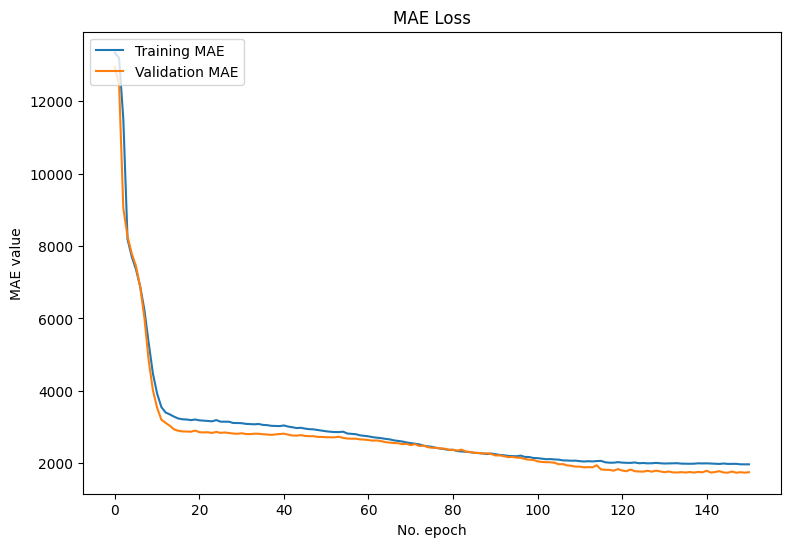

In [ ]:

# Plotting Mean Absolute Error Loss
plt.figure(figsize=(9, 6))
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.title('MAE Loss')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()



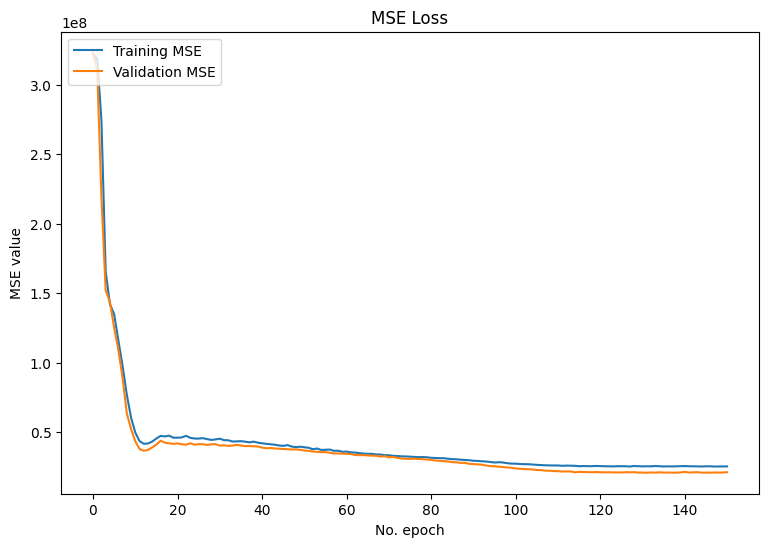

In [ ]:
# Plotting Mean Squared Error Loss
plt.figure(figsize=(9, 6))
plt.plot(mse, label='Training MSE')
plt.plot(val_mse, label='Validation MSE')
plt.title('MSE Loss')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
Regression_model = LinearRegression()
Random_forest_model = RandomForestRegressor(random_state=0)
Gradient_boosting_model = GradientBoostingRegressor(random_state=0)

# List of models
models = [Regression_model, Random_forest_model, Gradient_boosting_model]

# Function to get mean predictions for the ensemble
def ensemble_predictions(models, X):
    # make predictions
    predictions = [model.predict(X) for model in models]
    # convert predictions list to array
    predictions = np.array(predictions)
    # calculate mean prediction
    mean_predictions = np.mean(predictions, axis=0)
    return mean_predictions

# Train individual models
for model in models:
    model.fit(X_train, y_train)

# Get predictions from the ensemble
ensemble_preds = ensemble_predictions(models, X_test)

# Individual model performance

for i, model in enumerate(models, 1):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    model_results[str(models[i-1])] = {"MAE": mae,"MSE": mse,"RMSE": rmse, "R2": r2}

# Ensemble performance
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_preds))
ensemble_r2 = r2_score(y_test, ensemble_preds)

model_results

{'Neural Networks': {'MAE': 1753.57421875,
  'MSE': 21073318.0,
  'RMSE': 4590.568374395484,
  'R2': 0.8658608710795247},
 'LinearRegression()': {'MAE': 4181.194473753645,
  'MSE': 33596915.85136147,
  'RMSE': 5796.2846592762735,
  'R2': 0.7835929767120723},
 'RandomForestRegressor(random_state=0)': {'MAE': 2543.995413484547,
  'MSE': 21648566.614410166,
  'RMSE': 4652.802017538482,
  'R2': 0.8605555974184735},
 'GradientBoostingRegressor(random_state=0)': {'MAE': 2405.7538884837613,
  'MSE': 18742066.691740822,
  'RMSE': 4329.210862471453,
  'R2': 0.8792771669587912}}

In [ ]:


# Calculate MAE and MSE for the ensemble
ensemble_mae = mean_absolute_error(y_test, ensemble_preds)
ensemble_mse = mean_squared_error(y_test, ensemble_preds)

# Update the results
model_results["Ensemble"]= {"RMSE": ensemble_rmse, "R2": ensemble_r2, "MAE": ensemble_mae, "MSE": ensemble_mse}
results=pd.DataFrame(model_results).transpose()
results

,MAE,MSE,RMSE,R2
Neural Networks,1753.574219,2.107332e+07,4590.568374,0.865861
LinearRegression(),4181.194474,3.359692e+07,5796.284659,0.783593
RandomForestRegressor(random_state=0),2543.995413,2.164857e+07,4652.802018,0.860556
GradientBoostingRegressor(random_state=0),2405.753888,1.874207e+07,4329.210862,0.879277
Ensemble,2717.601935,1.989773e+07,4460.687686,0.871833


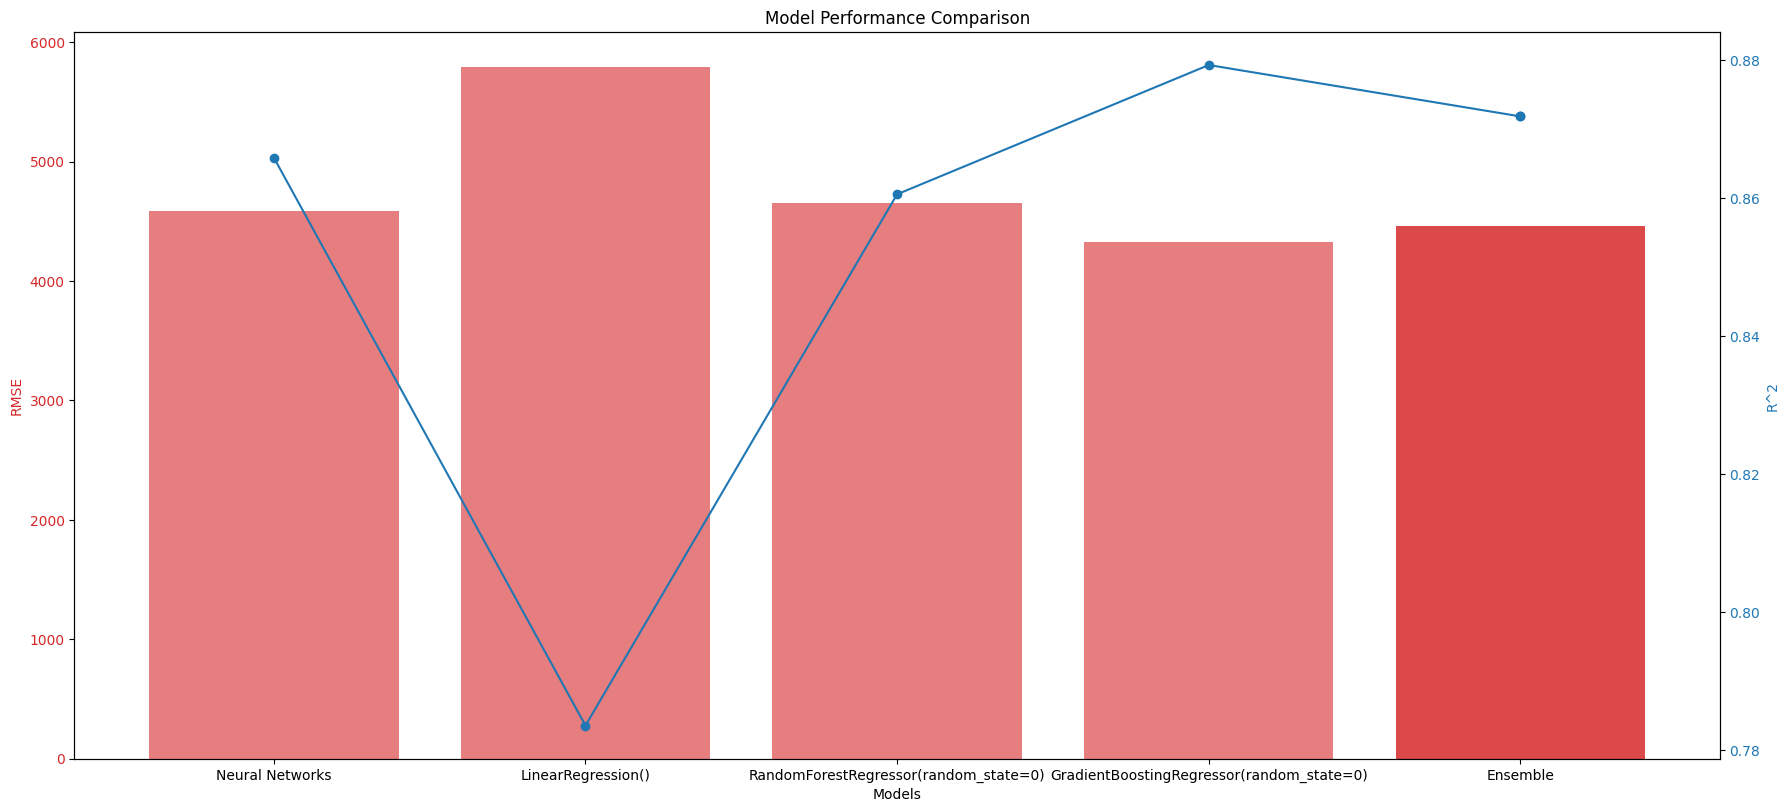

In [ ]:

# Data for plotting
labels = list(model_results.keys()) + ['Ensemble']
rmse_values = [res['RMSE'] for res in model_results.values()] + [ensemble_rmse]
r2_values = [res['R2'] for res in model_results.values()] + [ensemble_r2]

# Plotting
fig, ax1 = plt.subplots(figsize=(18, 8))
color = 'tab:red'
ax1.set_xlabel('Models')
ax1.set_ylabel('RMSE', color=color)
ax1.bar(labels, rmse_values, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R^2', color=color)
ax2.plot(labels, r2_values, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Models Performance Comparison')
plt.show()

#  ✅ Conclusions :

The Neural Network model has the best performance in terms of MAE, indicating it has the lowest average error in predictions. However, it doesn't have the highest R2, meaning it's not the best model in terms of explaining the variability of the response data.
Gradient Boosting performs the best in terms of MSE, RMSE, and R2, making it the most reliable model for this dataset, as it not only provides predictions closest to the actual values but also explains the highest proportion of variance in the dataset.
The Linear Regression model appears to be the least accurate, with the highest MAE, MSE, RMSE, and the lowest R2 score.
The Ensemble model, while expected to perform better, doesn't outperform all individual models, particularly Gradient Boosting. However, it performs better than Linear Regression and is comparable to Random Forest and Neural Networks.
This analysis suggests that Gradient Boosting might be the most suitable model for this particular dataset, followed closely by the Neural Network model. The ensemble method used here may need to be revisited or optimized further for improved performance.